## EDA Salary of Data Professions

## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# loading data into data frame
df=pd.read_csv('data/Salary Prediction of Data Professions.csv')

In [6]:
# head of the data
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [33]:
# rearranging columns [input+output]
cols = df.columns.tolist()
cols = cols[:7] + cols[8:] + list([cols[7]])
df = df[cols]

## Column Descriptors

`FIRST NAME`: First name of the data professional (String)

`LAST NAME`: Last name of the data professional (String)

`SEX`: Gender of the data professional (String: 'F' for Female, 'M' for Male)

`DOJ (Date of Joining)`: The date when the data professional joined the company (Date in MM/DD/YYYY format)

`CURRENT DATE`: The current date or the snapshot date of the data (Date in MM/DD/YYYY format)

`DESIGNATION`: The job role or designation of the data professional (String: e.g., Analyst, Senior Analyst, Manager)

`AGE`: Age of the data professional (Integer)

`SALARY`: Annual salary of the data professional (Float)

`UNIT`: Business unit or department the data professional works in (String: e.g., IT, Finance, Marketing)

`LEAVES USED`: Number of leaves used by the data professional (Integer)

`LEAVES REMAINING`: Number of leaves remaining for the data professional (Integer)

`RATINGS`: Performance ratings of the data professional (Float)

`PAST EXP`: Past work experience in years before joining the current company (Float)

### NOTE
- The dataset was compiled from internal HR records of a hypothetical company.
- Each record represents a unique data professional with various attributes collected from their employment history.
- The data spans from 2009 to 2016, capturing a snapshot as of January 7, 2016.

In [36]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   UNIT              2639 non-null   object 
 8   LEAVES USED       2636 non-null   float64
 9   LEAVES REMAINING  2637 non-null   float64
 10  RATINGS           2637 non-null   float64
 11  PAST EXP          2639 non-null   int64  
 12  SALARY            2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [63]:
# changing the column datatypes
df = df.astype({'SEX': 'category', 'UNIT':'category', 'DESIGNATION':'category','LEAVES USED': 'Int32', 'LEAVES REMAINING':'Int32'})
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2639 non-null   object        
 1   LAST NAME         2637 non-null   object        
 2   SEX               2639 non-null   category      
 3   DOJ               2638 non-null   datetime64[ns]
 4   CURRENT DATE      2639 non-null   datetime64[ns]
 5   DESIGNATION       2639 non-null   category      
 6   AGE               2636 non-null   float64       
 7   UNIT              2639 non-null   category      
 8   LEAVES USED       2636 non-null   Int32         
 9   LEAVES REMAINING  2637 non-null   Int32         
 10  RATINGS           2637 non-null   float64       
 11  PAST EXP          2639 non-null   int64         
 12  SALARY            2639 non-null   int64         
dtypes: Int32(2), category(3), datetime64[ns](2), float64(2), int64(2), object(2)
m

In [71]:
# description of data
df.describe()

,DOJ,CURRENT DATE,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SALARY
count,2638,2639,2636.000000,2636.0,2637.0,2637.000000,2639.000000,2639.000000
mean,2013-10-28 07:31:58.726307840,2016-01-07 00:00:00,24.756449,22.501517,7.503223,3.486159,1.566881,58136.678287
min,2009-01-23 00:00:00,2016-01-07 00:00:00,21.000000,15.0,0.0,2.000000,0.000000,40001.000000
25%,2013-05-05 00:00:00,2016-01-07 00:00:00,22.000000,19.0,4.0,2.000000,0.000000,43418.000000
50%,2013-12-04 00:00:00,2016-01-07 00:00:00,24.000000,22.0,8.0,3.000000,1.000000,46781.000000
75%,2014-07-06 12:00:00,2016-01-07 00:00:00,25.000000,26.0,11.0,4.000000,2.000000,51401.500000
max,2015-01-31 00:00:00,2016-01-07 00:00:00,45.000000,30.0,15.0,5.000000,23.000000,388112.000000
std,NaN,NaN,3.908228,4.604469,4.603193,1.114933,2.728416,36876.956944


### insights

- There are total of `30` leaves given to a employee
- only `25%` employees have more than `2` `PAST EXP`

In [81]:
# finding missing values
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
SALARY              0
dtype: int64

In [119]:
# handling missing values in each column
df.fillna({'LAST NAME': '-'}, inplace=True) # Filling with '-'
df.dropna(subset=['DOJ'],inplace=True) # droping those rows
df['AGE'].fillna(int(df['AGE'].mean()),inplace=True) # filling age with mean  of age
df['LEAVES USED'].fillna(30-df['LEAVES REMAINING'],inplace=True) # total leaves are 30
df['LEAVES REMAINING'].fillna(30-df['LEAVES USED'],inplace=True) # total leaves are 30
df['RATINGS'].fillna(0,inplace=True) # fillinf with '0'
df.isna().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
SALARY              0
dtype: int64

In [130]:
# checking duplicte rows values
df.duplicated().sum()

# droping duplicated rows
df.drop_duplicates(keep='first',inplace=True)

In [138]:
# number of niques values in column
df.nunique()

FIRST NAME          2366
LAST NAME           2476
SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                5
PAST EXP              21
SALARY              2304
dtype: int64

### insights

- There are `2` categories in `SEX` column
- There are total of `6` diffeent `DESIGNATION`
- There are total of `6` different `UNIT`

In [144]:
# displying SEX column unique values
df['SEX'].unique().tolist()

['F', 'M']

In [143]:
# displying the Designations
df['DESIGNATION'].unique().tolist()

['Analyst',
 'Senior Analyst',
 'Senior Manager',
 'Associate',
 'Manager',
 'Director']

In [141]:
# displaying UNITS
df['UNIT'].unique().tolist()

['Finance', 'IT', 'Operations', 'Marketing', 'Web', 'Management']

In [214]:
# creating column for day/month/year
df['DAY'] = df['DOJ'].dt.day
df['DAY NAME'] = df['DOJ'].dt.day_name()

df['MONTH'] = df['DOJ'].dt.month

df['YEAR'] = df['DOJ'].dt.year

## Visualizations

(array([1258.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1219.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

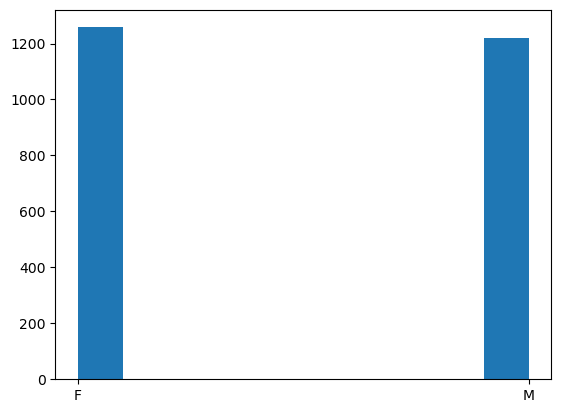

In [156]:
# Number of males and females
plt.hist(df['SEX'])

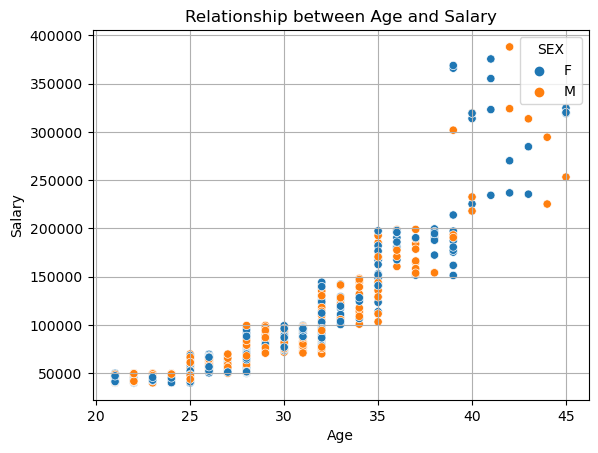

In [192]:
# relation between age and salary with age
# plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x= df['AGE'],y= df['SALARY'],hue=df['SEX'])
plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

<Axes: xlabel='SALARY', ylabel='Density'>

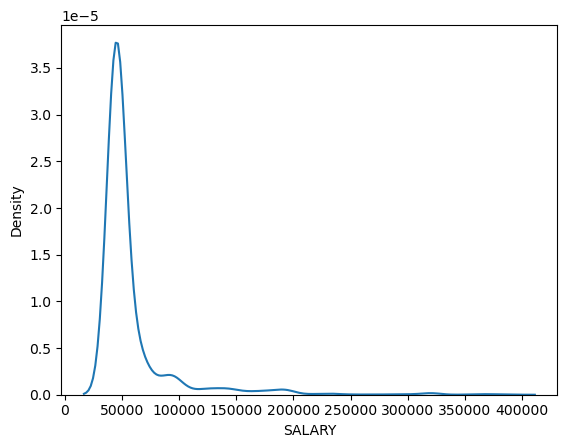

In [203]:
# salary distribution
sns.kdeplot(df['SALARY'])

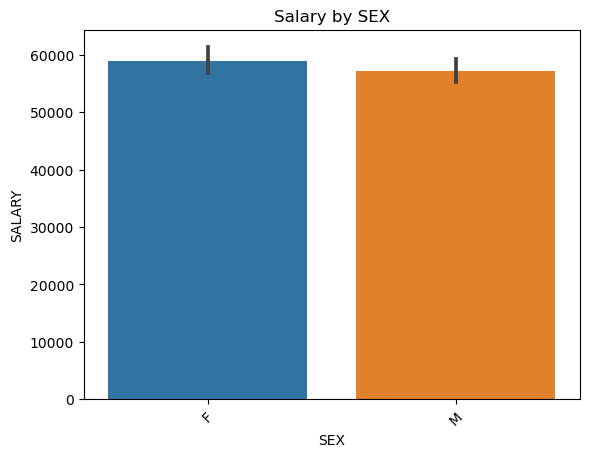

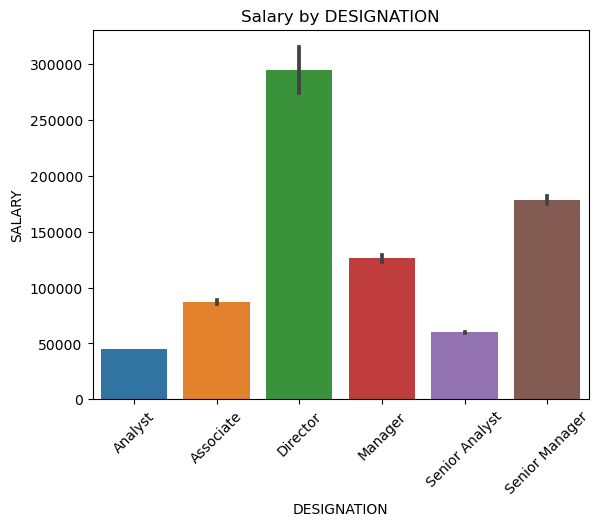

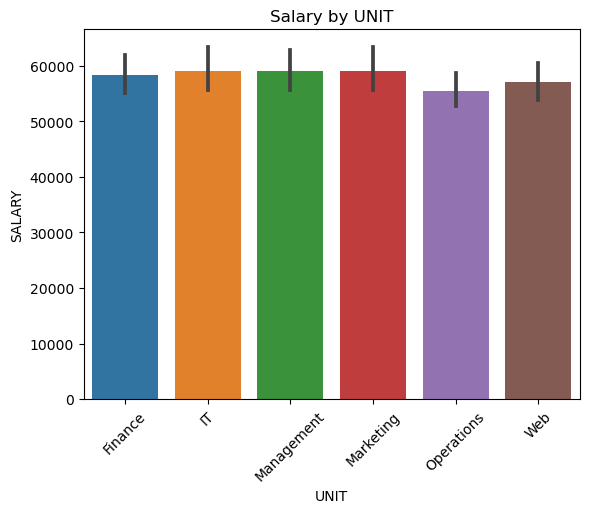

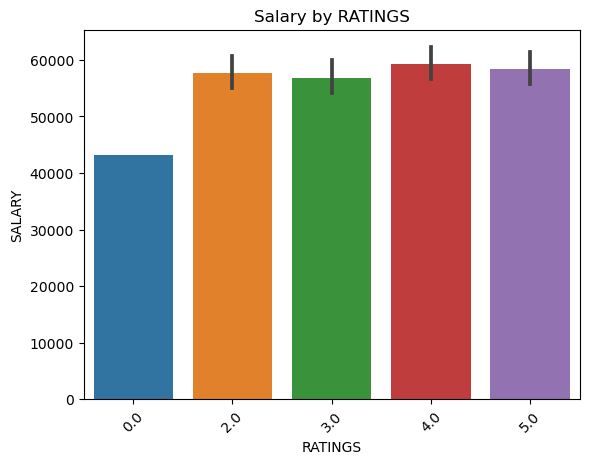

In [258]:
# comparision of salary with different categories
cat_features = ['SEX','DESIGNATION','UNIT','RATINGS']

for feature in cat_features:
    sns.barplot(data=df,x=df[feature],y=df['SALARY'])
    plt.title(f"Salary by {feature}")
    plt.xlabel(feature)
    plt.ylabel("SALARY")
    plt.xticks(rotation=45)
    plt.show()


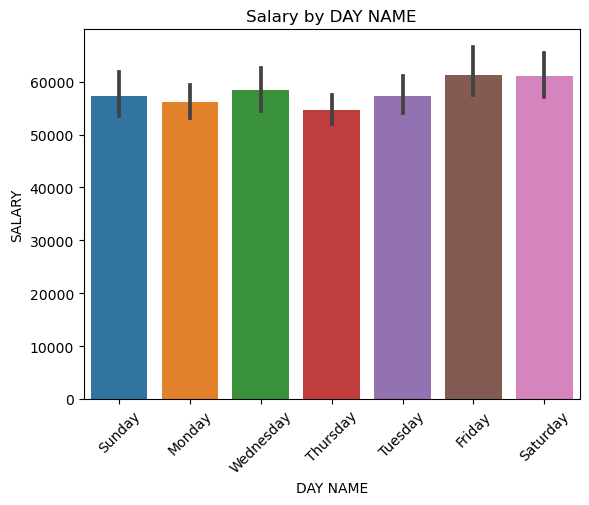

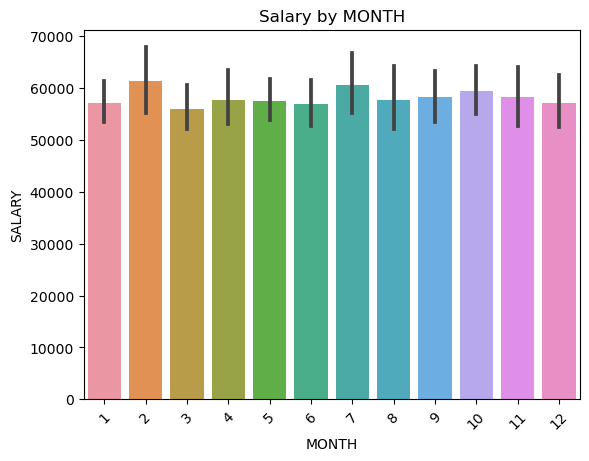

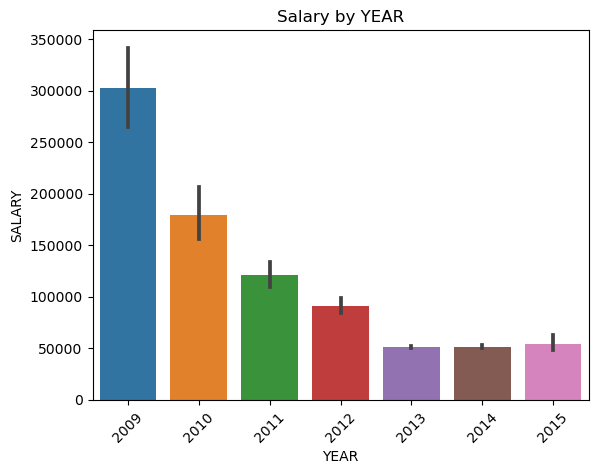

In [226]:
# comparision of salary with Joining Period

joining_period = ['DAY NAME','MONTH','YEAR']

for period in joining_period:
    sns.barplot(data=df,x=period,y='SALARY')
    plt.title(f"Salary by {period}")
    plt.xlabel(period)
    plt.ylabel('SALARY')
    plt.xticks(rotation=45)
    plt.show()

### insights

- `DAY NAME` and `MONTH` are not playing any role deciding the `SALARY`
- As `YEAR` increases salary decreases

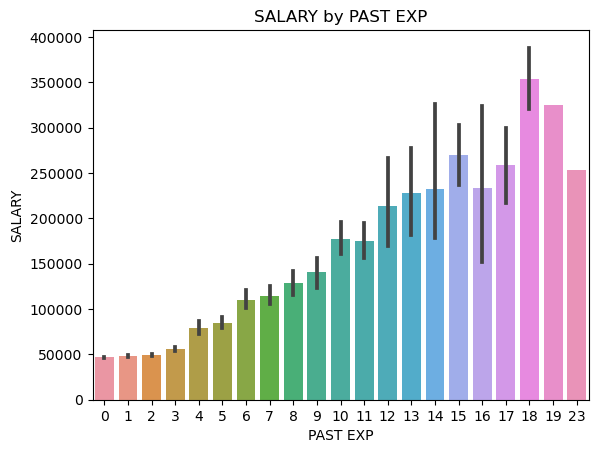

In [227]:
# Salary by PAST EXP
sns.barplot(data=df,x='PAST EXP',y='SALARY')
plt.title("SALARY by PAST EXP")
plt.xlabel("PAST EXP")
plt.ylabel("SALARY")
plt.show()

More `PAST EXP` --> More `SALARY`

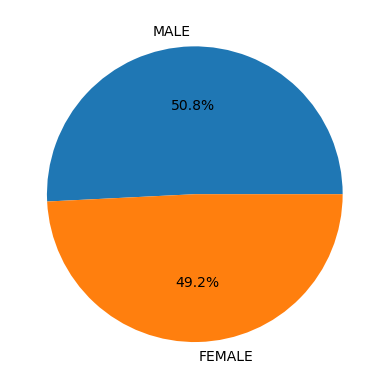

In [256]:
# df[df['SEX'] == 'M']['SALARY'].mean()/df['SALARY'].mean()
labels = ['MALE', 'FEMALE']
size = [df[df['SEX'] == 'F']['SALARY'].mean(),df[df['SEX'] == 'M']['SALARY'].mean()]
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.show()

both male and female has almose same average salary ratio

<Axes: xlabel='LEAVES USED', ylabel='SALARY'>

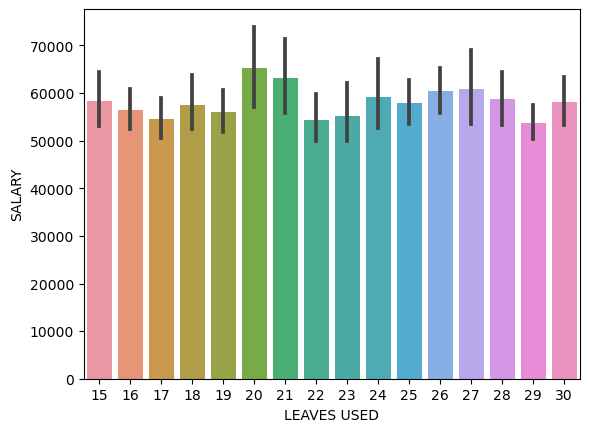

In [273]:
# salary by leaves
sns.barplot(data=df,x='LEAVES USED',y='SALARY')

<Axes: xlabel='LEAVES REMAINING', ylabel='SALARY'>

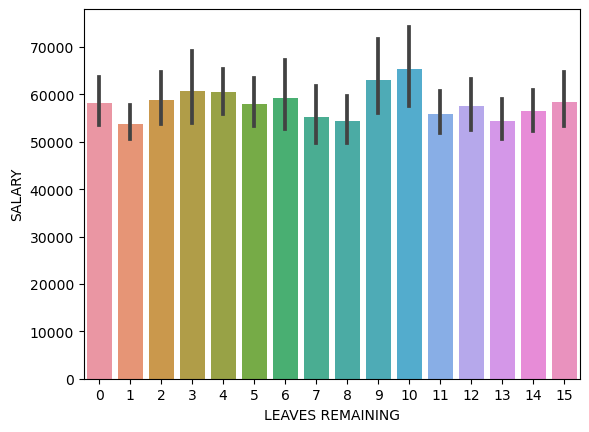

In [274]:
sns.barplot(data=df,x='LEAVES REMAINING',y='SALARY')

In [276]:
# Exporting the processed data into file
df.to_csv('data/cleaned_data.csv', index=False, header=True) 